In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
!pip install seaborn

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import PIL
import cv2

In [5]:
image_dir = Path('E:\Lian\S2\Datasets\Braille Dataset\Braille Dataset')

In [6]:
dir_list = list(image_dir.glob('*.jpg'))

In [7]:
image_count = len(dir_list)
image_count

1560

In [8]:
name_list = []
for i in dir_list:
    name_list.append(os.path.basename(i)[0])

In [9]:
#opens images and puts into a list
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    images.append(I)

In [10]:
#turn both lists in numpy arrays
images_list = np.array(images)
name_list = np.array(name_list).T #transpose - convert columns to rows

In [11]:
#encodes name_list and normalizes image_list
le = LabelEncoder()
name_list = le.fit_transform(name_list)

#covert image to 0 to 255 (pixel information)
images_list = images_list / 255.0 
print(images_list[0])

[[[0.76078431 0.76078431 0.76078431]
  [0.8        0.8        0.8       ]
  [0.80784314 0.80784314 0.80784314]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 [[0.75686275 0.75686275 0.75686275]
  [0.69411765 0.69411765 0.69411765]
  [0.7372549  0.7372549  0.7372549 ]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 [[0.78039216 0.78039216 0.78039216]
  [0.79607843 0.79607843 0.79607843]
  [0.76470588 0.76470588 0.76470588]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 ...

 [[0.76862745 0.76862745 0.76862745]
  [0.77254902 0.77254902 0.77254902]
  [0.76470588 0.76470588 0.76470588]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 [[0.77254902 0.77254902 0.77254902]
  [0.77647059 0.77647059 0.77647059]


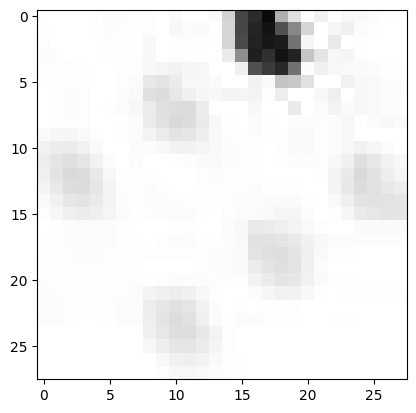

In [12]:
plt.imshow(images_list[1])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.2, random_state=42)

# Creating model: Trial 1: Adam Optimizer

In [29]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(units=288, activation="relu"),

    keras.layers.Dense(units=26, activation="softmax") #output layer
])
model.build((None, 28, 28, 3))

In [30]:
from tensorflow.keras.utils import plot_model
!pip install pydot

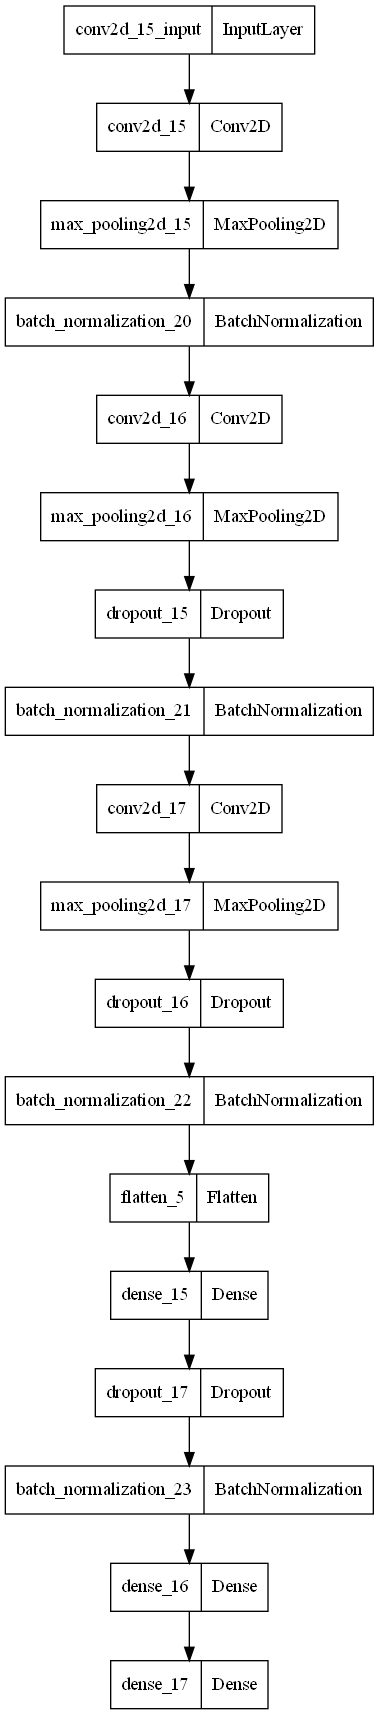

In [31]:
plot_model(model, to_file='model_1_braille_architecture.png')

In [32]:
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

if you use categorical-cross-entropy you need one-hot encoding, and if you use sparse-categorical-cross-entropy you encode as normal integers.

In [33]:
from keras.callbacks import EarlyStopping

In [34]:
es1 = EarlyStopping(patience=20, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

#The neural network will stop fitting if it gets 20 epochs without converge
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2])

Epoch 1/100
28/28 [==============================] - 3s 63ms/step - loss: 3.2161 - sparse_categorical_accuracy: 0.1283 - val_loss: 3.2607 - val_sparse_categorical_accuracy: 0.0427
Epoch 2/100
28/28 [==============================] - 1s 43ms/step - loss: 2.0077 - sparse_categorical_accuracy: 0.4032 - val_loss: 3.9331 - val_sparse_categorical_accuracy: 0.0427
Epoch 3/100
28/28 [==============================] - 1s 43ms/step - loss: 1.3834 - sparse_categorical_accuracy: 0.5830 - val_loss: 5.2070 - val_sparse_categorical_accuracy: 0.0427
Epoch 4/100
28/28 [==============================] - 1s 44ms/step - loss: 1.0647 - sparse_categorical_accuracy: 0.6930 - val_loss: 6.3817 - val_sparse_categorical_accuracy: 0.0427
Epoch 5/100
28/28 [==============================] - 1s 43ms/step - loss: 0.8787 - sparse_categorical_accuracy: 0.7320 - val_loss: 7.4516 - val_sparse_categorical_accuracy: 0.0427
Epoch 6/100
28/28 [==============================] - 1s 46ms/step - loss: 0.7119 - sparse_categorica

In [ ]:
model.summary()

In [36]:
time = np.arange(1, len(history.history['loss'])+1)

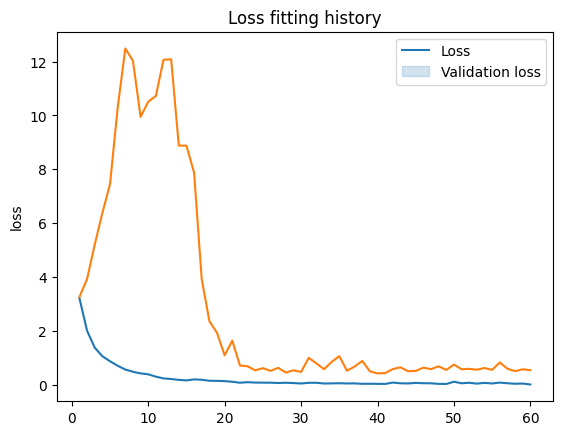

In [37]:
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])
plt.show()

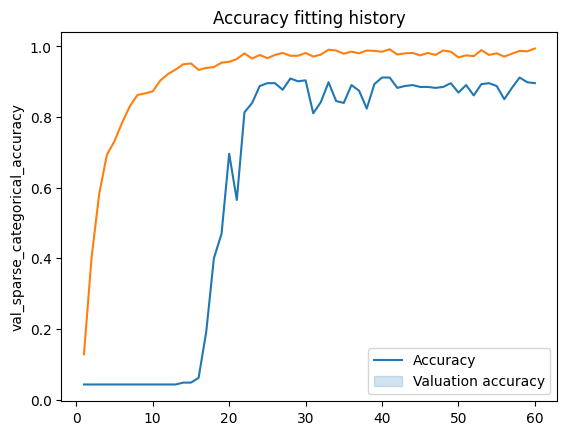

In [38]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])
plt.show()

In [39]:
print("Adam Optimizer")
model.evaluate(X_test, y_test)

Adam Optimizer
10/10 [==============================] - 0s 15ms/step - loss: 0.4418 - sparse_categorical_accuracy: 0.9038


[0.4418271780014038, 0.9038461446762085]

# Optimization Model 1

In [40]:
!pip install --upgrade tensorflow-model-optimization

In [41]:
import tensorflow_model_optimization as tfmot  # TensorFlow Model Optimization toolkit

In [42]:
# model_save_path = 'cnn_model.h5'
model_save_path = 'cnn_model1_braille.keras'
model.save(model_save_path)

# Get the size of the model in bytes
model_size = os.path.getsize(model_save_path)
print(f"Model size: {model_size / 1024:.2f} KB")

Model size: 6973.89 KB


In [43]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(0.1, begin_step=0, frequency=100)
  }

pruned_model = prune_low_magnitude(model, **pruning_params)
pruned_model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])
pruned_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d_  (None, 28, 28, 64)       9666      
 15 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_max_poo  (None, 14, 14, 64)       1         
 ling2d_15 (PruneLowMagnitud                                     
 e)                                                              
                                                                 
 prune_low_magnitude_batch_n  (None, 14, 14, 64)       257       
 ormalization_20 (PruneLowMa                                     
 gnitude)                                                        
                                                                 
 prune_low_magnitude_conv2d_  (None, 14, 14, 64)       73794     
 16 (PruneLowMagnitude)                               

# Pruning

In [44]:
import time
start_pruning_time = time.time()

# Train the model
history = pruned_model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2, tfmot.sparsity.keras.UpdatePruningStep()])

end_time = time.time()
total_time = end_time - start_pruning_time 
print(f"Total time: {total_time:.2f} seconds")

Epoch 1/100
28/28 [==============================] - 11s 78ms/step - loss: 0.0556 - sparse_categorical_accuracy: 0.9805 - val_loss: 0.9500 - val_sparse_categorical_accuracy: 0.8587
Epoch 2/100
28/28 [==============================] - 2s 54ms/step - loss: 0.0820 - sparse_categorical_accuracy: 0.9771 - val_loss: 1.6836 - val_sparse_categorical_accuracy: 0.7307
Epoch 3/100
28/28 [==============================] - 1s 51ms/step - loss: 0.0839 - sparse_categorical_accuracy: 0.9679 - val_loss: 1.2634 - val_sparse_categorical_accuracy: 0.7947
Epoch 4/100
28/28 [==============================] - 2s 54ms/step - loss: 0.0941 - sparse_categorical_accuracy: 0.9737 - val_loss: 0.6324 - val_sparse_categorical_accuracy: 0.8880
Epoch 5/100
28/28 [==============================] - 2s 54ms/step - loss: 0.0394 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.6052 - val_sparse_categorical_accuracy: 0.8907
Epoch 6/100
28/28 [==============================] - 1s 53ms/step - loss: 0.0644 - sparse_categoric

# Evaluate the model with testing data

In [45]:
# Evaluate the model on the test data
pruned_test_loss, pruned_test_acc = pruned_model.evaluate(X_test, y_test)

print(f"Test accuracy: {pruned_test_acc}")

10/10 [==============================] - 0s 19ms/step - loss: 0.7336 - sparse_categorical_accuracy: 0.8846
Test accuracy: 0.8846153616905212


In [46]:
model_save_path = 'cnn_pruned_model1_braille.keras'
pruned_model.save(model_save_path)

# Get the size of the model in bytes
model_size = os.path.getsize(model_save_path)
print(f"Model size after pruning: {model_size / 1024:.2f} KB")

Model size after pruning: 9295.02 KB


In [47]:
model_for_export = tfmot.sparsity.keras.strip_pruning(pruned_model)
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
tflite_model = converter.convert()

# Save the TFLite model to a file
model_save_path = 'pruned_model1_braille.tflite'
with open(model_save_path, 'wb') as f:
    f.write(tflite_model)

model_size = os.path.getsize(model_save_path)
print(f"Model size after pruning + convert to tf lite: {model_size / 1024:.2f} KB")

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp16ehcmev\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp16ehcmev\assets


Model size after pruning + convert to tf lite: 2292.46 KB


# Post Training Quantization

In [48]:
# Strip the pruning wrappers to finalize the pruned model
final_model = tfmot.sparsity.keras.strip_pruning(pruned_model)
final_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_20 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                      

In [49]:
# Convert to TensorFlow Lite model with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)

# Set quantization parameters
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Default optimization includes quantization

# Optionally, if you have representative data, you can enable full integer quantization:
# Provide a representative dataset for better accuracy in quantization
def representative_dataset():
    for data in X_test.take(100):  # use a small sample of your data <<< what if we change this to 1000? to all data? 70rb? how?
        yield [tf.dtypes.cast(data, tf.float32)] # can we change this to integer?

converter.representative_dataset = representative_dataset
converter.target_spec.supported_types = [tf.float16]  # This can be int8 as well, hm... << nope, error

# Convert the model
quantized_tflite_model = converter.convert()

# Save the quantized model to a file
with open('quantized_pruned_model1_braille.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

# To load and use the TFLite model later:
interpreter = tf.lite.Interpreter(model_path='quantized_pruned_model1_braille.tflite')
interpreter.allocate_tensors()

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmplw6t49ru\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmplw6t49ru\assets


In [50]:
final_model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [51]:
start_quantization_time = time.time()

history = final_model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2, tfmot.sparsity.keras.UpdatePruningStep()])

end_time = time.time()
total_time = end_time - start_quantization_time 
print(f"Total time: {total_time:.2f} seconds")

Epoch 1/100
28/28 [==============================] - 3s 52ms/step - loss: 0.0411 - sparse_categorical_accuracy: 0.9851 - val_loss: 1.6897 - val_sparse_categorical_accuracy: 0.7867
Epoch 2/100
28/28 [==============================] - 1s 40ms/step - loss: 0.0325 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.6529 - val_sparse_categorical_accuracy: 0.9067
Epoch 3/100
28/28 [==============================] - 1s 40ms/step - loss: 0.0293 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.7023 - val_sparse_categorical_accuracy: 0.9093
Epoch 4/100
28/28 [==============================] - 1s 40ms/step - loss: 0.0538 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.9436 - val_sparse_categorical_accuracy: 0.8613
Epoch 5/100
28/28 [==============================] - 1s 40ms/step - loss: 0.0423 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.5942 - val_sparse_categorical_accuracy: 0.9200
Epoch 6/100
28/28 [==============================] - 1s 40ms/step - loss: 0.0472 - sparse_categorica

In [52]:
model_size = os.path.getsize('quantized_pruned_model1_braille.tflite')
print(f"Model size after quantization: {model_size / 1024:.2f} KB")

Model size after quantization: 1152.30 KB


In [53]:
# Evaluate the model on the test data
final_test_loss, final_test_acc = final_model.evaluate(X_test, y_test)

print(f"Test accuracy: {final_test_acc}")

10/10 [==============================] - 0s 12ms/step - loss: 0.6367 - sparse_categorical_accuracy: 0.9038
Test accuracy: 0.9038461446762085


# Creating model: Trial 2: RMS Prop

In [56]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(units=288, activation="relu"),
    keras.layers.Dense(units=26, activation="softmax") #output layer
])
model.build((None, 28, 28, 3))

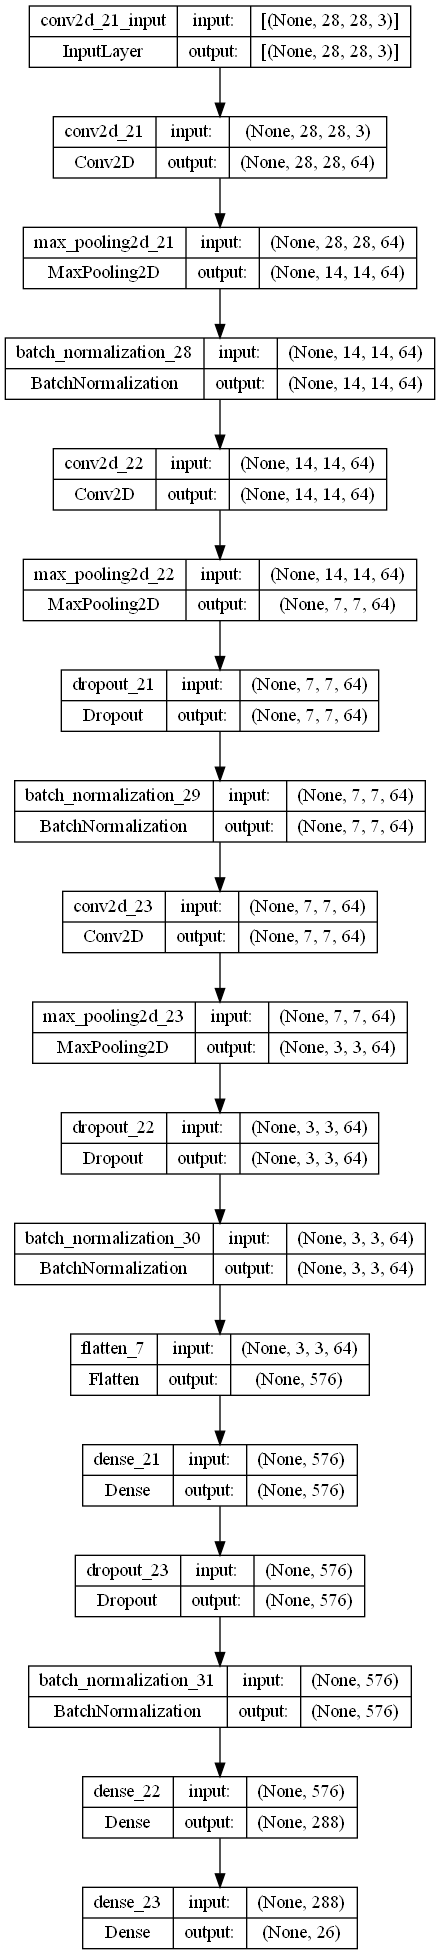

In [57]:
plot_model(model, to_file='model_2_braille_architecture.png', show_shapes=True, show_layer_names=True)

In [58]:
model.compile(optimizer="RMSprop", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [59]:
from keras.callbacks import EarlyStopping

In [60]:
es1 = EarlyStopping(patience=20, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

#The neural network will stop fitting if it gets 20 epochs without converge

history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2])

Epoch 1/100
28/28 [==============================] - 3s 61ms/step - loss: 2.9780 - sparse_categorical_accuracy: 0.1982 - val_loss: 3.3526 - val_sparse_categorical_accuracy: 0.0373
Epoch 2/100
28/28 [==============================] - 1s 43ms/step - loss: 1.8151 - sparse_categorical_accuracy: 0.4777 - val_loss: 4.0339 - val_sparse_categorical_accuracy: 0.0347
Epoch 3/100
28/28 [==============================] - 1s 50ms/step - loss: 1.3207 - sparse_categorical_accuracy: 0.6174 - val_loss: 4.7955 - val_sparse_categorical_accuracy: 0.0427
Epoch 4/100
28/28 [==============================] - 2s 57ms/step - loss: 1.0602 - sparse_categorical_accuracy: 0.6712 - val_loss: 6.1596 - val_sparse_categorical_accuracy: 0.0427
Epoch 5/100
28/28 [==============================] - 1s 43ms/step - loss: 0.7966 - sparse_categorical_accuracy: 0.7480 - val_loss: 9.1243 - val_sparse_categorical_accuracy: 0.0427
Epoch 6/100
28/28 [==============================] - 2s 61ms/step - loss: 0.6928 - sparse_categorica

In [61]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_28 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                      

In [62]:
time = np.arange(1, len(history.history['loss'])+1)

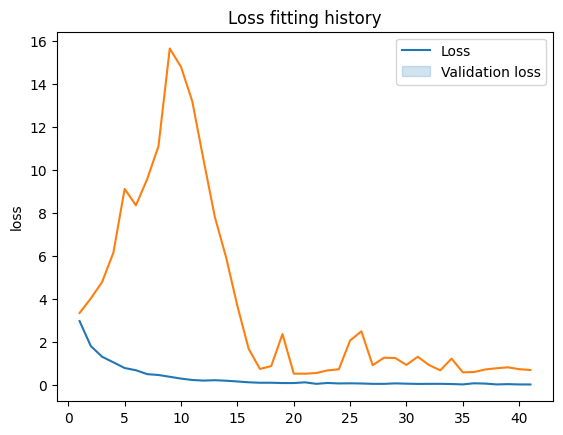

In [63]:
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])
plt.show()

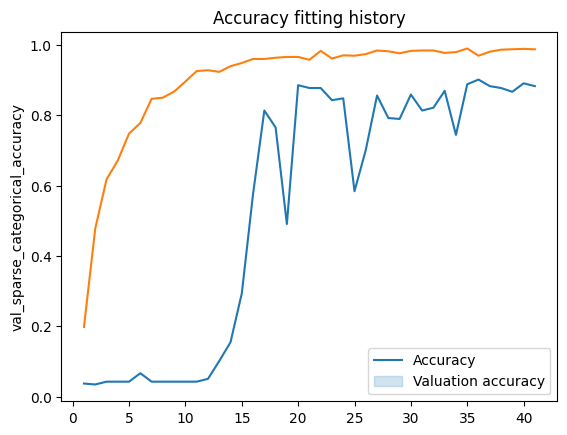

In [64]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])
plt.show()

In [65]:
print("RMSProp")
model.evaluate(X_test, y_test)

RMSProp
10/10 [==============================] - 0s 11ms/step - loss: 0.5822 - sparse_categorical_accuracy: 0.8878


[0.582162082195282, 0.8878205418586731]

# Optimization Model 2

In [66]:
# model_save_path = 'cnn_model.h5'
model_save_path = 'cnn_model2_braille.keras'
model.save(model_save_path)

# Get the size of the model in bytes
model_size = os.path.getsize(model_save_path)
print(f"Model size: {model_size / 1024:.2f} KB")

Model size: 4679.02 KB


In [67]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(0.1, begin_step=0, frequency=100)
  }

pruned_model = prune_low_magnitude(model, **pruning_params)
pruned_model.compile(optimizer="RMSprop", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])
pruned_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d_  (None, 28, 28, 64)       9666      
 21 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_max_poo  (None, 14, 14, 64)       1         
 ling2d_21 (PruneLowMagnitud                                     
 e)                                                              
                                                                 
 prune_low_magnitude_batch_n  (None, 14, 14, 64)       257       
 ormalization_28 (PruneLowMa                                     
 gnitude)                                                        
                                                                 
 prune_low_magnitude_conv2d_  (None, 14, 14, 64)       73794     
 22 (PruneLowMagnitude)                               

# Pruning

In [68]:
import time
start_pruning_time = time.time()

# Train the model
history = pruned_model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2, tfmot.sparsity.keras.UpdatePruningStep()])

end_time = time.time()
total_time = end_time - start_pruning_time 
print(f"Total time: {total_time:.2f} seconds")

Epoch 1/100
28/28 [==============================] - 7s 61ms/step - loss: 0.0620 - sparse_categorical_accuracy: 0.9840 - val_loss: 1.4327 - val_sparse_categorical_accuracy: 0.7547
Epoch 2/100
28/28 [==============================] - 1s 45ms/step - loss: 0.0400 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.5839 - val_sparse_categorical_accuracy: 0.9093
Epoch 3/100
28/28 [==============================] - 1s 45ms/step - loss: 0.0407 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.5869 - val_sparse_categorical_accuracy: 0.9147
Epoch 4/100
28/28 [==============================] - 2s 54ms/step - loss: 0.0299 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.6936 - val_sparse_categorical_accuracy: 0.8907
Epoch 5/100
28/28 [==============================] - 1s 50ms/step - loss: 0.0333 - sparse_categorical_accuracy: 0.9920 - val_loss: 1.4629 - val_sparse_categorical_accuracy: 0.8027
Epoch 6/100
28/28 [==============================] - 1s 48ms/step - loss: 0.0220 - sparse_categorica

# Evaluate the model with testing data¶

In [69]:
# Evaluate the model on the test data
pruned_test_loss, pruned_test_acc = pruned_model.evaluate(X_test, y_test)
print(f"Test accuracy: {pruned_test_acc}")

10/10 [==============================] - 0s 12ms/step - loss: 0.5788 - sparse_categorical_accuracy: 0.9295
Test accuracy: 0.9294871687889099


In [70]:
model_save_path = 'cnn_pruned_model2_braille.keras'
pruned_model.save(model_save_path)

# Get the size of the model in bytes
model_size = os.path.getsize(model_save_path)
print(f"Model size after pruning: {model_size / 1024:.2f} KB")

Model size after pruning: 6998.11 KB


In [71]:
model_for_export = tfmot.sparsity.keras.strip_pruning(pruned_model)
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
tflite_model = converter.convert()

# Save the TFLite model to a file
model_save_path = 'pruned_model2_braille.tflite'
with open(model_save_path, 'wb') as f:
    f.write(tflite_model)

model_size = os.path.getsize(model_save_path)
print(f"Model size after pruning + convert to tf lite: {model_size / 1024:.2f} KB")

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpjt1454tw\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpjt1454tw\assets


Model size after pruning + convert to tf lite: 2292.46 KB


# Post Training Quantization

In [72]:
# Strip the pruning wrappers to finalize the pruned model
final_model = tfmot.sparsity.keras.strip_pruning(pruned_model)
final_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_28 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                      

In [73]:
# Convert to TensorFlow Lite model with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)

# Set quantization parameters
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Default optimization includes quantization

# Optionally, if you have representative data, you can enable full integer quantization:
# Provide a representative dataset for better accuracy in quantization
def representative_dataset():
    for data in X_test.take(100):  # use a small sample of your data <<< what if we change this to 1000? to all data? 70rb? how?
        yield [tf.dtypes.cast(data, tf.float32)] # can we change this to integer?

converter.representative_dataset = representative_dataset
converter.target_spec.supported_types = [tf.float16]  # This can be int8 as well, hm... << nope, error

# Convert the model
quantized_tflite_model = converter.convert()

# Save the quantized model to a file
with open('quantized_pruned_model2_braille.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

# To load and use the TFLite model later:
interpreter = tf.lite.Interpreter(model_path='quantized_pruned_model2_braille.tflite')
interpreter.allocate_tensors()

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpq2srrkf_\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpq2srrkf_\assets


In [74]:
final_model.compile(optimizer="RMSprop", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [75]:
start_quantization_time = time.time()

history = final_model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2, tfmot.sparsity.keras.UpdatePruningStep()])

end_time = time.time()
total_time = end_time - start_quantization_time 
print(f"Total time: {total_time:.2f} seconds")

Epoch 1/100
28/28 [==============================] - 3s 57ms/step - loss: 0.0440 - sparse_categorical_accuracy: 0.9851 - val_loss: 1.7911 - val_sparse_categorical_accuracy: 0.8107
Epoch 2/100
28/28 [==============================] - 1s 47ms/step - loss: 0.0186 - sparse_categorical_accuracy: 0.9931 - val_loss: 0.7814 - val_sparse_categorical_accuracy: 0.9067
Epoch 3/100
28/28 [==============================] - 1s 43ms/step - loss: 0.0192 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.6998 - val_sparse_categorical_accuracy: 0.9013
Epoch 4/100
28/28 [==============================] - 1s 43ms/step - loss: 0.0335 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.6600 - val_sparse_categorical_accuracy: 0.9067
Epoch 5/100
28/28 [==============================] - 1s 49ms/step - loss: 0.0257 - sparse_categorical_accuracy: 0.9908 - val_loss: 0.8185 - val_sparse_categorical_accuracy: 0.8800
Epoch 6/100
28/28 [==============================] - 1s 44ms/step - loss: 0.0219 - sparse_categorica

In [76]:
model_size = os.path.getsize('quantized_pruned_model2_braille.tflite')
print(f"Model size after quantization: {model_size / 1024:.2f} KB")

Model size after quantization: 1152.30 KB


In [77]:
# Evaluate the model on the test data
final_test_loss, final_test_acc = final_model.evaluate(X_test, y_test)

print(f"Test accuracy: {final_test_acc}")

10/10 [==============================] - 0s 13ms/step - loss: 0.6892 - sparse_categorical_accuracy: 0.8974
Test accuracy: 0.8974359035491943
